In [1]:
import numpy as np
import nltk
from nltk.corpus import gutenberg, stopwords, PlaintextCorpusReader
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt

extext1 = gutenberg.raw('tomsawyer.txt')
extext2 = gutenberg.raw('huckelberry.txt')
extext3 = gutenberg.raw('lifeonmissisipi.txt')
extext4 = gutenberg.raw('grant.txt') 
extext5 = gutenberg.raw('letters.txt')
extext6 = gutenberg.raw('melville-moby_dick.txt')
extext7 = gutenberg.raw('whitman-leaves.txt')
extext8 = gutenberg.raw('taleoftwocities.txt')
extext9 = gutenberg.raw('greatexpectations.txt')
extext10 = gutenberg.raw('hound.txt')
extext11 = gutenberg.raw('scarlet.txt')

In [225]:
def txt_preprocessing(text,n):
    
    #stop_words=set(stopwords.words('english'))
    stop_words = set()
    stop_words.update(['gutenberg','project','a','d',';','s','t'])
    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(text)
    words_lowercase = []
    
    for ii in words:
        words_lowercase.append(ii.lower())
    
    
    filtered_sentence = []
    filtered_sentence = [jj for jj in words_lowercase if not jj in stop_words]   
    word_freq = nltk.FreqDist(filtered_sentence)
    
    ww = []
    ww = [jj for jj in word_freq.most_common() if jj[1] >n]
    
    

    return ww
    

def filter_text(text,filter_lexicon):
    filtered = []
    n=1
    freq = text[0][1]
    for ii in text:
        if ii[0] in filter_lexicon:
            if ii[1] == freq:
                filtered.append(ii + (n,))
            else:
                filtered.append(ii + (n,))
                n=n+1
            freq = ii[1]
    return filtered        
    

def rank_statistic(text1,text2,plot):

    w1 ,n1 = zip(*text1)
    w2 ,n2 = zip(*text2)
    shared_words = list(set(w1) & set(w2))

    filtered_text1 =filter_text(text1,shared_words)
    filtered_text2 =filter_text(text2,shared_words)
    
    filtered_text1.sort()
    filtered_text2.sort()
    
    words1,freq1,rank1 = zip(*filtered_text1)
    words2,freq2,rank2 = zip(*filtered_text2)
    
    ranks = np.array([rank1,freq1,rank2,freq2],dtype=np.float)
    ranks[1,:] = ranks[1,:]/ranks[1,:].sum()
    ranks[3,:] = ranks[3,:]/ranks[3,:].sum()
    weigths = -((ranks[1,:] * np.log(ranks[1,:])) + (ranks[3,:] * np.log(ranks[3,:])))
    weigths = weigths / weigths.sum()
    distance = (np.sum(np.abs(ranks[0,:]-ranks[2,:]) * weigths))/len(shared_words)
    
    if plot == 1:
        fig, ax = plt.subplots()
        ax.scatter(rank1, rank2, s=0)
        for i, words1 in enumerate(words1):
             ax.annotate(words1, (rank1[i],rank2[i]))
        ax.set_xlim([0,80])
        ax.set_ylim([0,80])
        #plt.savefig('abc.png',format='png', dpi=1000)
        plt.show()
 
    return distance

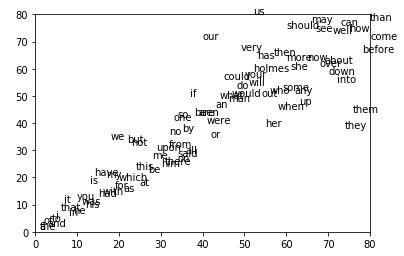

0.016801087787602264

In [253]:
text1=txt_preprocessing(extext10,5)
text2=txt_preprocessing(extext11,5)
rank_statistic(text1,text2,1)


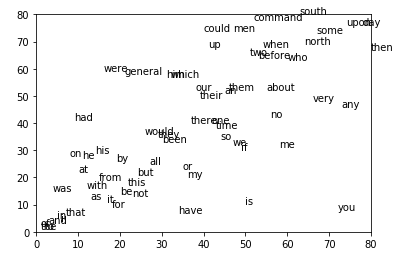

0.073606281146579189

In [244]:
text1=txt_preprocessing(extext4,5)
text2=txt_preprocessing(extext5,5)
rank_statistic(text1,text2,1)

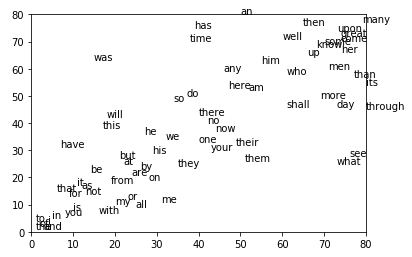

0.045960142747803197

In [245]:
text1=txt_preprocessing(extext5,4)
text2=txt_preprocessing(extext7,4)
rank_statistic(text1,text2,1)